In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def nplot(pics ,c='gray', s=(10,8),sh=False):
    fig, axs = plt.subplots(1, len(pics), facecolor='0.2', figsize=s, sharey=sh)
    for i in range(len(pics)):
        axs[i].imshow(pics[i], cmap=c)
    plt.show()

In [3]:
def more_plot(pics, shape, c='gray', s=(8,8), sh=False):
    fig, axs = plt.subplots(shape[0], shape[1], facecolor='0.2',figsize=s, sharey=sh)
    for idx, val in enumerate(pics):
        i = idx // shape[1]
        j = idx % shape[1]
        axs[i,j].imshow(pics[idx], cmap=c)
    plt.show()

In [4]:
pic = Image.open('mypic2.jpg').convert('L')
npic = np.array(pic)

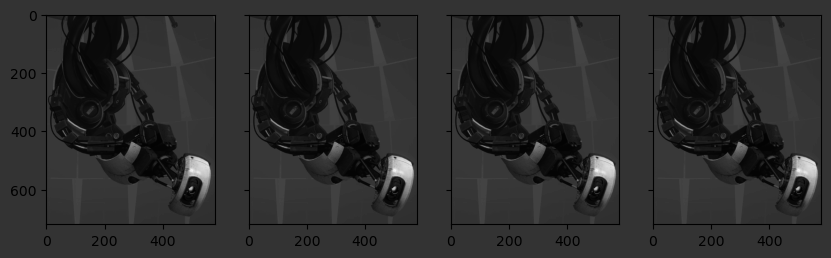

In [5]:
nplot([pic]*4,sh=True)

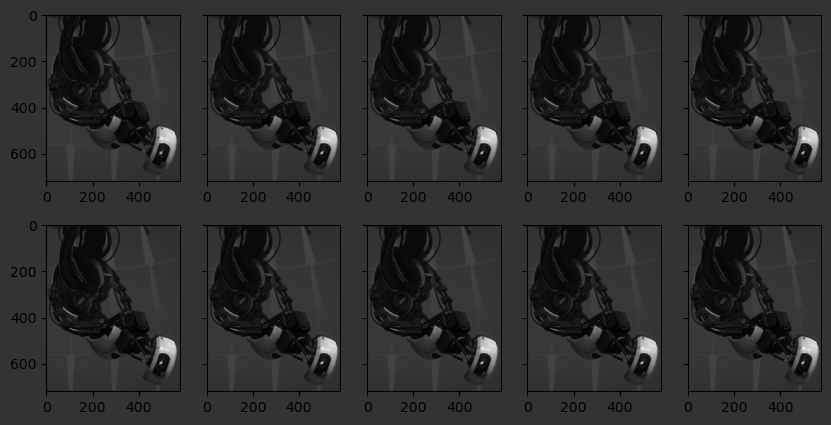

In [6]:
more_plot([pic]*10, shape=(2,5), sh=True, s=(10,5)) 

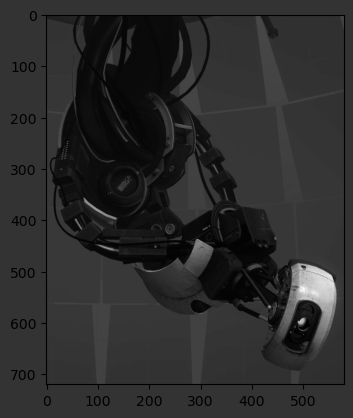

In [7]:
plt.figure(facecolor='0.2')
plt.imshow(pic, cmap='gray') #oh it's you

<Figure size 640x480 with 0 Axes>

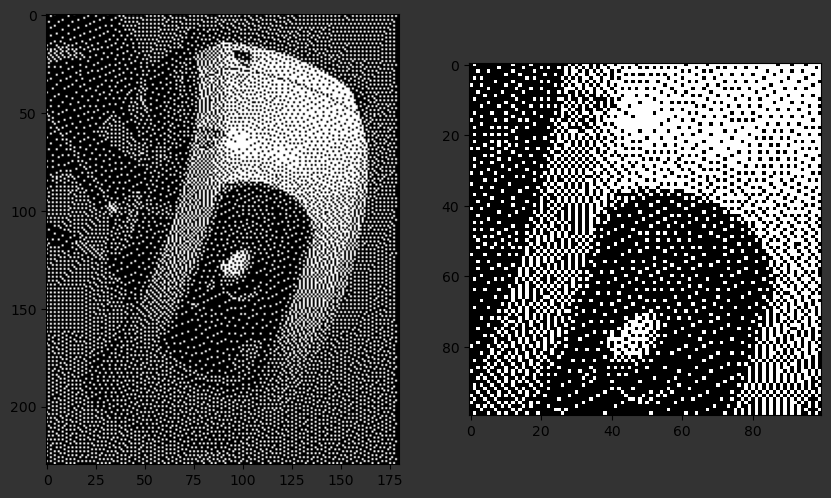

In [8]:
pic_ = Image.open('mypic2.jpg').convert('1')
pic_crop1 = pic_.crop((400,470,580,700))
pic_crop2 = pic_crop1.crop((50,50,150,150)) 
plt.figure(facecolor='0.2')
nplot([pic_crop1, pic_crop2])

<Figure size 640x480 with 0 Axes>

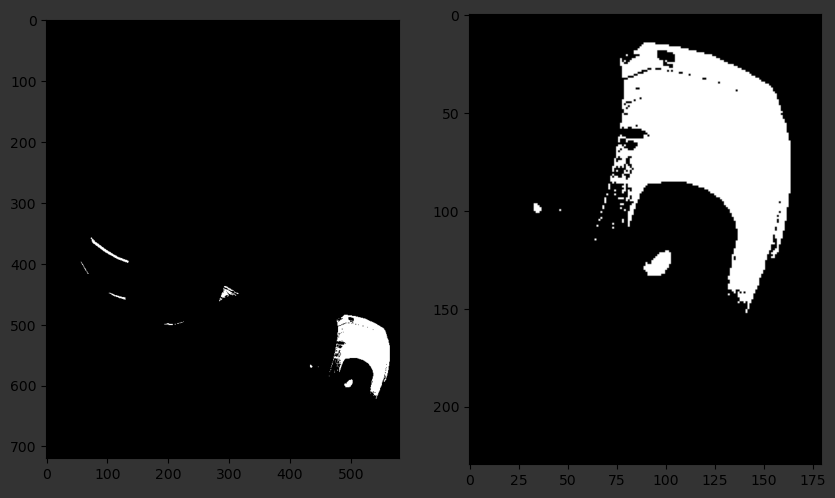

In [9]:
pic_ = Image.open('mypic2.jpg').convert('1', dither=0)
pic_crop1 = pic_.crop((400,470,580,700))
plt.figure(facecolor='0.2')
nplot([pic_, pic_crop1])

In [10]:
from scipy.signal import convolve2d
from scipy.ndimage import median_filter
from scipy.ndimage import gaussian_filter
from scipy.ndimage import sobel

In [11]:
#gradient edge detection
filterX = np.zeros((3,3))
filterY = np.zeros((3,3))
filterX[1,0] = -0.5
filterX[1,2] = 0.5
filterY[0,1] = -0.5
filterY[2,1] = 0.5
dx1 = convolve2d(pic, filterX)
dy1 = convolve2d(pic, filterY)

grad_edge = np.sqrt(dx1*dx1+dy1*dy1)

In [12]:
#Roberts cross
mx = np.array([[1, 0], [0, -1]])
my = np.array([[0, 1], [-1, 0]])
Gx = convolve2d(pic, mx)
Gy = convolve2d(pic, my)

rob_cross = np.abs(Gx) + np.abs(Gy)

In [13]:
#sobel operator
pic01 = npic / 255.0
sobX = sobel(pic01, 1)
sobY = sobel(pic01, 0)

sobel_abs = np.abs(sobX) + np.abs(sobX)
sobel_pyth = np.hypot(sobX, sobY)

In [14]:
#gauss_filter first then sobel
G_pic = gaussian_filter(npic, 3)
pic0 = G_pic / 255.0
sobX = sobel(pic0, 1)
sobY = sobel(pic0, 0)

gauss_sobel = np.hypot(sobX, sobY)

In [15]:
#gauss_filter into sobel into median
gauss_sobel_median = (median_filter(gauss_sobel, size=3))

In [16]:
#sobel first then median_filter
sobel_median = median_filter(sobel_pyth, size=3)

In [18]:
cr_grad_edge = grad_edge[470:720,400:580]
cr_rob_cross = rob_cross[470:720,400:580]
cr_sob_pyth = sobel_pyth[470:720,400:580]
cr_sob_abs = sobel_abs[470:720,400:580]

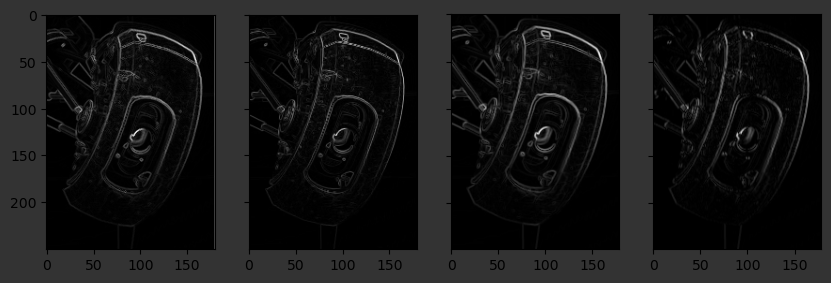

In [19]:
nplot([cr_grad_edge, cr_rob_cross, cr_sob_pyth, cr_sob_abs], sh=True)

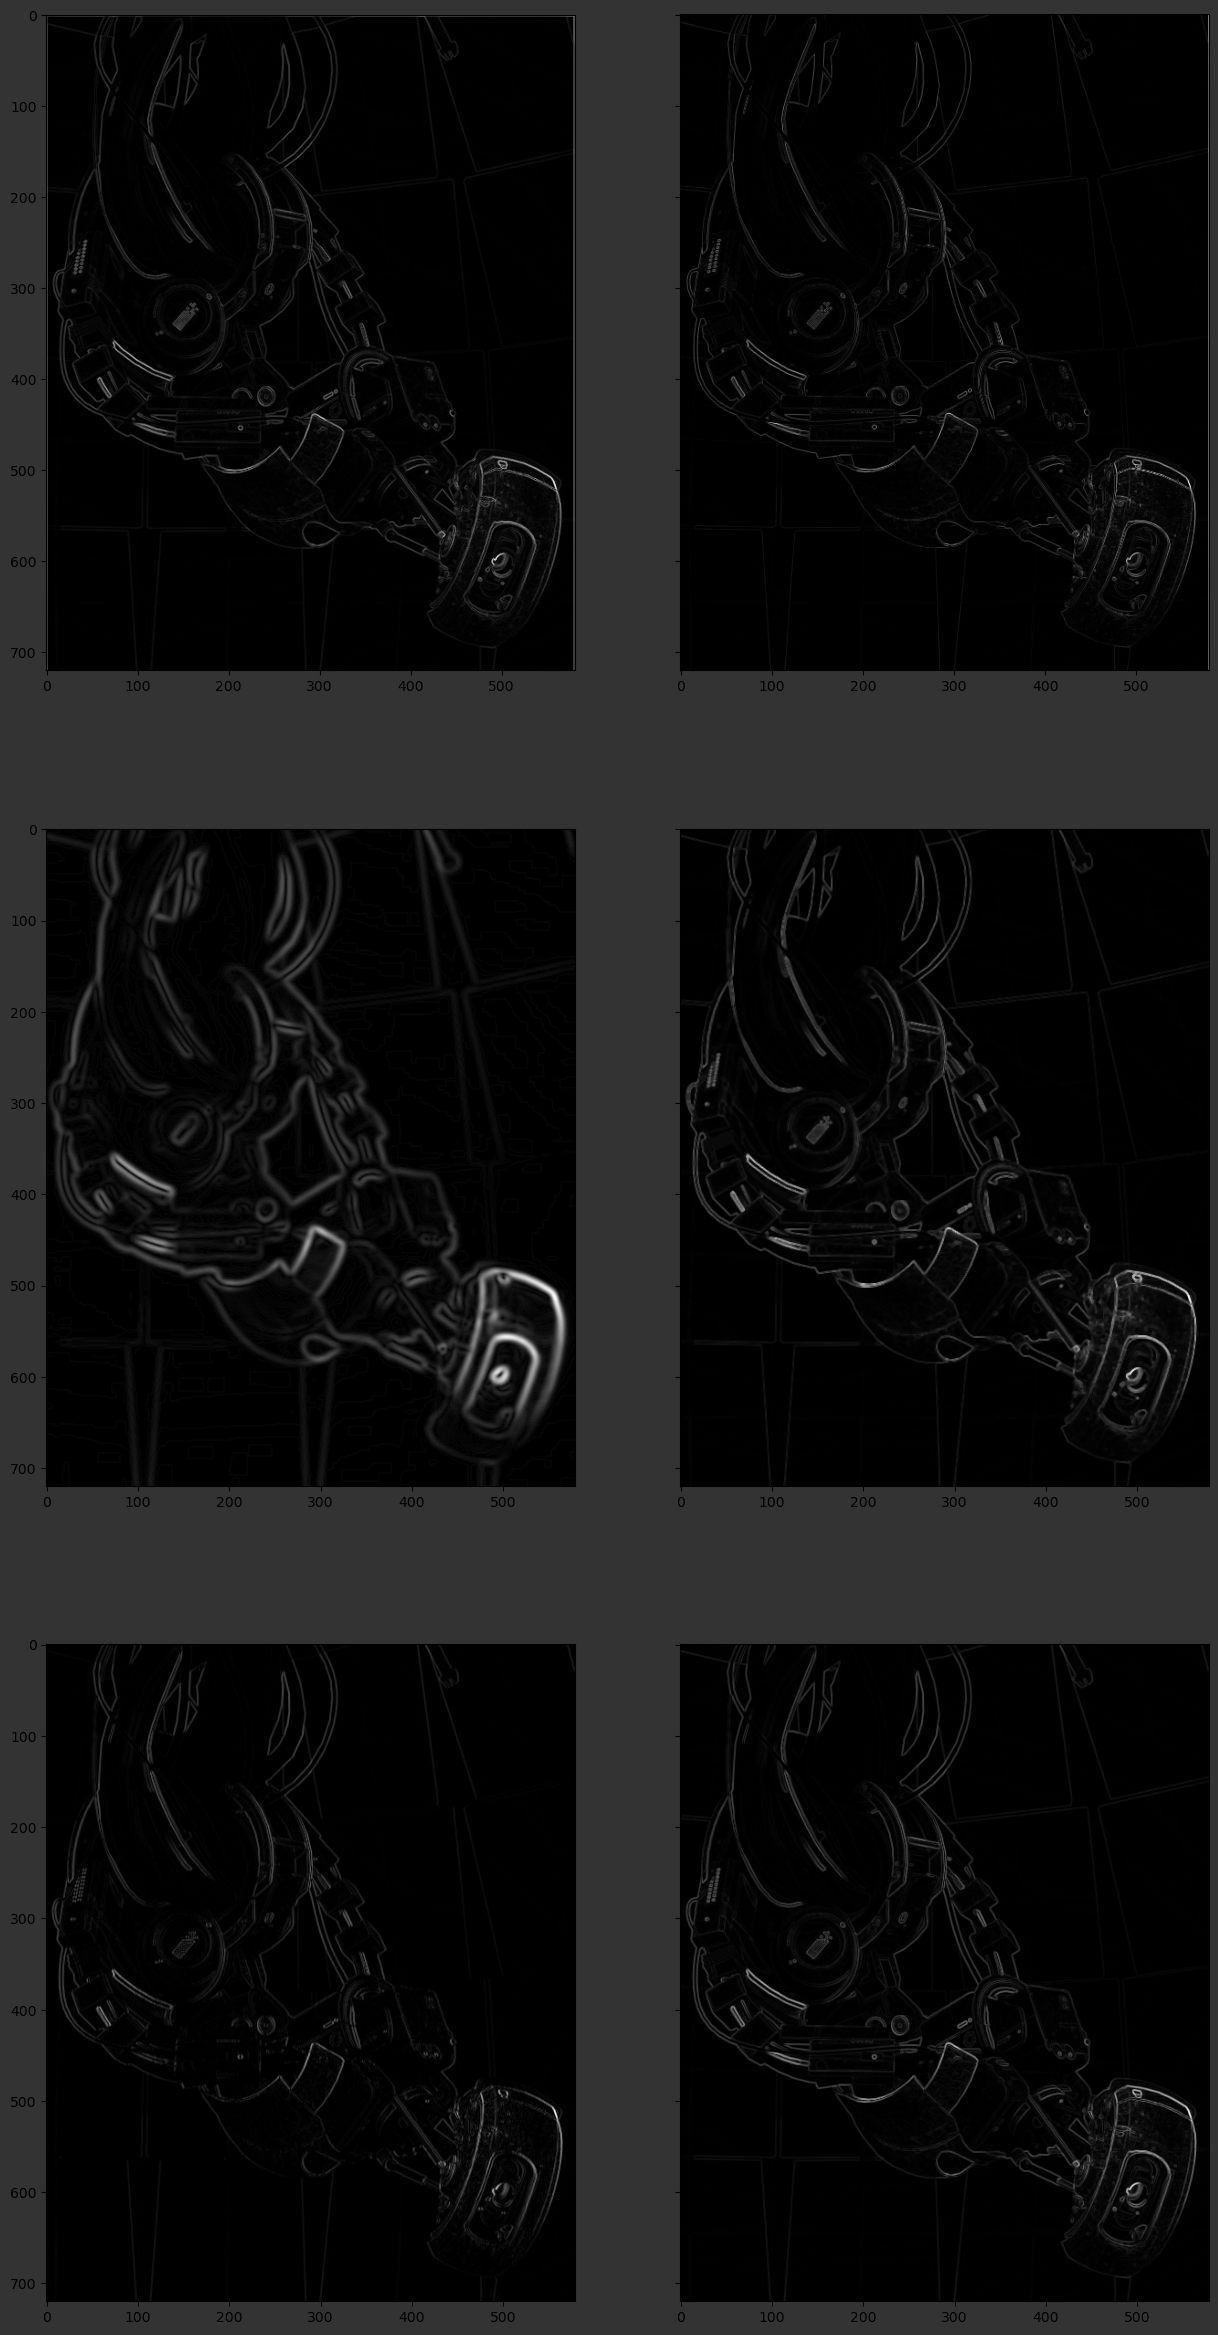

In [21]:
more_plot([grad_edge, rob_cross, gauss_sobel, sobel_median, sobel_abs, sobel_pyth], sh=True, shape=(3,2), s=(15,30))

In [22]:
#convert to binary array
A_ = (gauss_sobel_median > .035) * 1
B_ = (sobel_median > .02) * 1

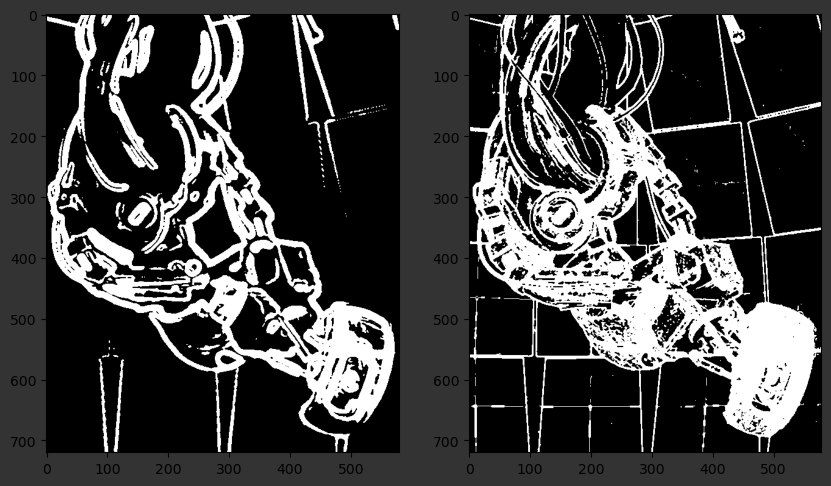

In [23]:
nplot([A_,B_])

In [27]:
def Circle(r):
    axs = np.linspace(-1, 1, 2 * r + 1)
    x,y = np.meshgrid(axs,axs)
    return (x**2 + y**2 < 1) * 1

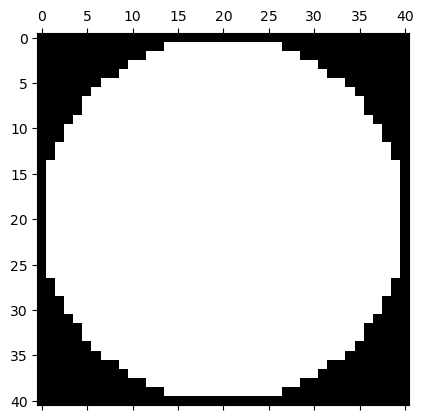

In [33]:
plt.matshow(Circle(20), cmap='gray')